Interact.Slider{Float64}(Signal{Float64}(1.0, nactions=0),"m",1.0,0.1:0.1:2.0,".3f",true)

Interact.Slider{Int64}(Signal{Int64}(175, nactions=0),"n_cs",175,50:1:300,"d",true)

Interact.Slider{Int64}(Signal{Int64}(10, nactions=0),"dn_fs",10,1:1:20,"d",true)

Interact.Slider{Int64}(Signal{Int64}(10, nactions=0),"dn_ig",10,1:1:20,"d",true)

Interact.Slider{Int64}(Signal{Int64}(130, nactions=0),"dn_sg",130,1:1:260,"d",true)

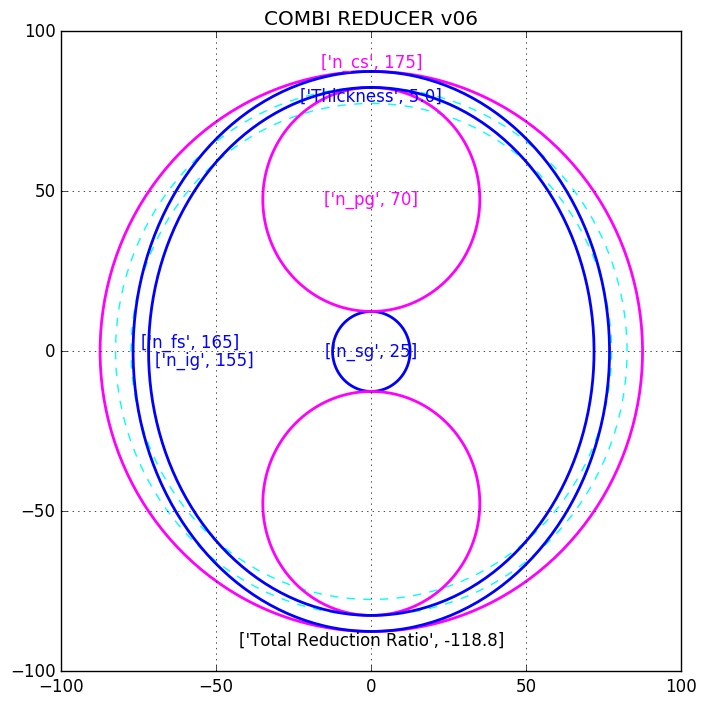

In [35]:
#######################################################
# COMBI REDUCER with Planetary & Harmonic Drive
# V06 for Julia 0.5
# 2016.10.24
# Dymaxion.kim
#######################################################
 
using PyPlot
using Interact
 
# Basic Parameter
alpha=collect(0:0.02:2*pi);
max_n_cs = 300
max_dn_fs = 20
max_dn_ig = 20
max_dn_sg = max_n_cs - max_dn_fs - max_dn_ig
# Making New Figure
f=figure(figsize=(8,8))
# Interact Macro
@manipulate for m = 0.1:0.1:2, # Module of The Gear
    n_cs = 50:1:max_n_cs, # Number of Teeth for Circular Spline
    dn_fs = 1:1:max_dn_fs, # Different Number of Teeth for Flex Spline
    dn_ig = 1:1:max_dn_ig, # Different Number of Teeth for Internal Gear
    dn_sg = 1:1:max_dn_sg # Different Number of Teeth for Sun Gear
    
    withfig(f) do
        grid("on")
        axis("auto")
        title("COMBI REDUCER v06")
        
        # Draw Circular Spline
        r_cs = m*n_cs/2
        plot( r_cs*sin(alpha), r_cs*cos(alpha), linewidth=2, color="Magenta" )
        annotate(["n_cs",Int(n_cs)],xy=(0,r_cs),ha="center",va="bottom", color="magenta")
        
        # Draw Flex Spline in Idle Status
        r_fs = m*(n_cs-dn_fs)/2
        plot( r_fs*sin(alpha), r_fs*cos(alpha), linestyle="--", color="cyan" )

        # Draw Internal Gear in Idle Status
        r_ig = m*(n_cs-dn_fs-dn_ig)/2
        plot( r_ig*sin(alpha), r_ig*cos(alpha), linestyle="--", color="cyan" )
        
        # Draw Sun Gear
        r_sg = m*(n_cs-dn_fs-dn_ig-dn_sg)/2
        n_sg = 2*r_sg/m
        if r_sg > 0
            plot( r_sg*sin(alpha), r_sg*cos(alpha), linewidth=2, color="blue" )
            annotate(["n_sg",Int(n_sg)],xy=(0,0),ha="center",va="center", color="blue")
        else
            plot( r_sg*sin(alpha), r_sg*cos(alpha), linewidth=4, linestyle="--", color="red" )
            annotate(["n_sg is in minus",Int(n_sg)],xy=(0,0),ha="center",va="center", color="red")
        end
        
        # Draw Planet Gears
        t_fs = r_fs-r_ig # Thickness of Flex Spline's Plastic
        r_pg = (r_cs-t_fs-r_sg)/2
        plot( r_pg*sin(alpha), r_pg*cos(alpha)+(r_sg+r_pg), linewidth=2, color="magenta" )
        plot( r_pg*sin(alpha), r_pg*cos(alpha)-(r_sg+r_pg), linewidth=2, color="magenta" )
        n_pg = 2*r_pg/m
        annotate(["n_pg",Int(n_pg)],xy=(0,r_sg+r_pg),ha="center",va="center", color="magenta")
        annotate(["Thickness",t_fs],xy=(0,r_sg+2*r_pg),ha="center",va="top", color="blue")
        
        # Draw Flex Spline in assembled
        L_fs = 2*pi*r_fs
        Dl_fs = 2*r_cs
        Ds_fs = sqrt(-3*Dl_fs^2 + 4*L_fs*Dl_fs/pi)
        plot( (Ds_fs/2)*sin(alpha), (Dl_fs/2)*cos(alpha), linewidth=2, color="blue" )
        n_fs = 2*r_fs/m
        annotate(["n_fs",Int(n_fs)],xy=(-0.9*r_fs,0),ha="left",va="bottom", color="blue")

        # Draw Internal Gear in assembled
        L_ig = 2*pi*r_ig
        Dl_ig = Dl_fs - 2*t_fs
        #Ds_ig = sqrt(-3*Dl_ig^2 + 4*L_ig*Dl_ig/pi)
        Ds_ig = Ds_fs - 2*t_fs
        plot( (Ds_ig/2)*sin(alpha), (Dl_ig/2)*cos(alpha), linewidth=2, color="blue" )
        n_ig = 2*r_ig/m
        annotate(["n_ig",Int(n_ig)],xy=(-0.9*r_ig,0),ha="left",va="top",color="blue")
        
        # Reduction Ratio
        RRp = (n_sg+n_ig)/n_sg
        RRh = n_fs/(n_fs-n_cs)
        RRt = RRp * RRh
        annotate(["Total Reduction Ratio",RRt],xy=(0,-r_cs),ha="center",va="top", color="black")

    end
end
